<a href="https://colab.research.google.com/github/Janani-Raju/Bharat-Intern/blob/main/Bharat_Intern_task_3_Cat_and_Dog_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 22.3MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.5MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile("/content/dogs-vs-cats.zip")
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#Create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5386 - accuracy: 0.7285 - val_loss: 0.6299 - val_accuracy: 0.6864
Epoch 2/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4664 - accuracy: 0.7776 - val_loss: 0.4895 - val_accuracy: 0.7740
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4005 - accuracy: 0.8202 - val_loss: 0.4860 - val_accuracy: 0.7844
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3380 - accuracy: 0.8524 - val_loss: 0.5302 - val_accuracy: 0.7938
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2611 - accuracy: 0.8920 - val_loss: 0.6976 - val_accuracy: 0.7782
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.1970 - accuracy: 0.9224 - val_loss: 1.2669 - val_accuracy: 0.6870
Epoch 7/10
625/625 [==============================] - 65s 102ms/step - loss: 0.1260 - accuracy: 0.9526 - val_loss: 0.7157 - val_ac

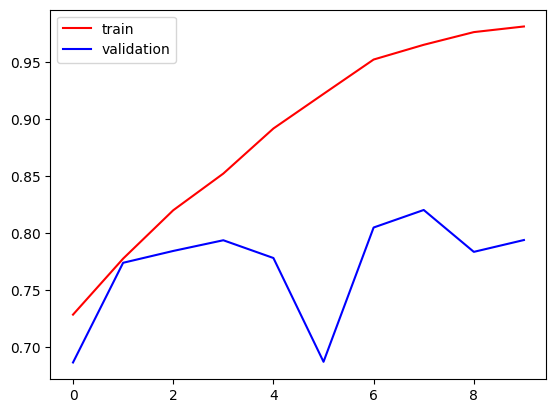

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

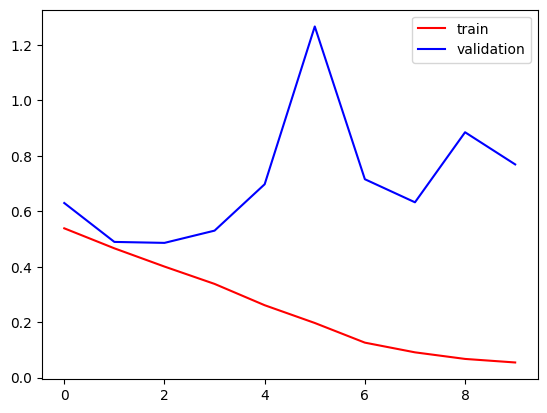

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.save('catvsdog.h5')

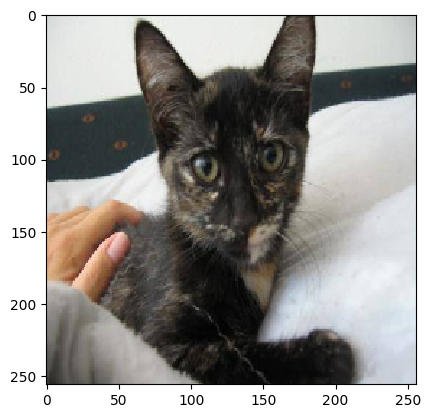

In [ ]:
from tensorflow.keras.preprocessing import image
path ='/content/train/cats/cat.109.jpg'
img = image.load_img(path,target_size=(256,256))
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
import numpy as np
img_array = np.array(img)
img_array.shape

(256, 256, 3)

In [ ]:
img_array=img_array.reshape(1,256,256,3)

In [ ]:
a = model.predict(img_array)
if a==[[0]]:
    print('cat')
else:
    print('dog')

1/1 [==============================] - 0s 374ms/step
cat
